In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Complete for Iris and Wine datasets

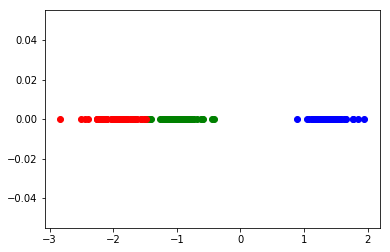

In [2]:

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import pandas as pd


def loadIris():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    feature_matrix = X
    labels = y
    return feature_matrix, labels

def loadWine():
    df = pd.io.parsers.read_csv(
        'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
        header=None,
        )
    X_wine = df.values[:,1:]
    y_wine = df.values[:,0]-1 #classes start at 0

def fisherLDA(feature_matrix):
    class1 = feature_matrix[0:50, 0:4] # this is for iris dataset
    class2 = feature_matrix[50:100, 0:4]
    class3 = feature_matrix[100:150, 0:4]
    
    # define lambda functions
    within_class_cov = lambda x: np.array([x_i.reshape(-1,1) @ x_i.reshape(1,-1) 
                                           for x_i in (x - x.mean(axis=0))]).sum(axis=0)

    class_mean = X.mean(axis=0)
    cov_class_means = lambda x: (x.mean(axis=0) - class_mean).reshape(-1,1) @ (x.mean(axis=0) - class_mean).reshape(1,-1) * x.shape[0]
    
    # build S_W matrix (sum of within-class covariance matrices)
    S_W = within_class_cov(class1) + within_class_cov(class2) + within_class_cov(class3)
    
    # build S_B matrix (covariance of class means)
    S_B = cov_class_means(class1) + cov_class_means(class2) + cov_class_means(class3)
        
    A = np.dot(linalg.inv(S_W), S_B)
    eig_values, eig_vectors = linalg.eig(A)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    eig_vec1 = np.array(eig_pairs[0][1])
    eig_vec2 = np.array(eig_pairs[1][1])
    return eig_vec1, eig_vec2

def main():
    feature_matrix, labels = loadIris()
    w1, w2 = fisherLDA(feature_matrix)
    Y1 = np.dot(np.array(w1), np.array(feature_matrix[0:50]).T)
    Y2 = np.dot(np.array(w1), np.array(feature_matrix[50:100]).T)
    Y3 = np.dot(np.array(w1), np.array(feature_matrix[100:150]).T)
    plt.plot(Y1, [0]*  Y1.shape[0], 'ob')
    plt.plot(Y2, [0]*  Y2.shape[0], 'og')
    plt.plot(Y3, [0]*  Y3.shape[0], 'or')
    plt.show()

if __name__ == "__main__":
    main()

# Unmix "mixed1.wav" and "mixed2.wav" using ICA

In [6]:
from IPython.display import HTML
def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [26]:
from scipy.io import wavfile
import numpy as np

# load mixed samples "mixed1.wav", "mixed2.wav"
print('mixed1.wav')
wavPlayer('mixed1.wav')
sample_rate, mixed1 = wavfile.read('mixed1.wav')

print('mixed2.wav')
wavPlayer('mixed2.wav')
_, mixed2 = wavfile.read('mixed2.wav')

mixed_signals = np.c_[mixed1, mixed2]
print(mixed_signals.shape)


mixed1.wav


mixed2.wav


(149760, 2)


In [27]:
from sklearn.decomposition import FastICA
# run ICA on the samples
# Compute ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(mixed_signals)  # Reconstruct signals
# A_ = ica.mixing_  # Get estimated mixing matrix

In [28]:
# normalize each source by dividing by it's absolute maximum value, then multiply samples by 15252 to restore power
wave1_recovered = 15252 * S_[:,0] / np.abs(S_[:,0]).max()
wave2_recovered = 15252 * S_[:,1] / np.abs(S_[:,1]).max()


In [30]:
# save wavs to disk. 
# note #1: you must use the same 'rate' from when loading the mixed samples
# note #2: you must change the type of the samples to np.int16 before saving
wavfile.write('wave1_recovered.wav', sample_rate, wave1_recovered.astype(np.int16))
wavfile.write('wave2_recovered.wav', sample_rate, wave2_recovered.astype(np.int16))

In [31]:
# use wavPlayer("file.wav") to listen to them
# what was the guy saying? which TV show is this from?
print('wave1_recovered.wav')
wavPlayer('wave1_recovered.wav')
print('wave2_recovered.wav')
wavPlayer('wave2_recovered.wav')


wave1_recovered.wav


wave2_recovered.wav


The quote is from the TV show Archer (Space Race part: I)
https://en.wikipedia.org/wiki/Space_Race_(Archer)

And the text says:
<img src="http://img.picturequotes.com/2/339/338778/i-wont-lie-to-you-this-mission-will-be-dangerous-would-you-say-wed-be-venturing-into-a-zone-of-quote-1.jpg">